## Proof that the prior of a fixed variance Normal distribution is normal

The proof that the posterior distribution of a normal distribution with a fixed variance and a normal prior is also a normal distribution is a fundamental result in Bayesian statistics. It relies on the properties of the normal distribution and Bayes' theorem.

Suppose we have a normal likelihood with fixed variance, where the likelihood is given as:

$$P(\theta | x) \propto \exp\left(-\frac{1}{2\sigma^2}(x - \theta)^2\right)$$

Here, $\theta$ is the parameter we want to estimate, \(x\) is the observed data, and $\sigma^2$ is the fixed variance.

Now, let's assume we have a normal prior for $\theta$:

$$P(\theta) \propto \exp\left(-\frac{1}{2\tau^2}(\theta - \mu)^2\right)$$

Where $\mu$ is the prior mean, and $\tau^2$ is the prior variance.

According to Bayes' theorem, the posterior distribution is proportional to the product of the likelihood and the prior:

$$P(\theta | x) \propto P(x | \theta) \cdot P(\theta)$$

Substituting the expressions for the likelihood and prior:

$$P(\theta | x) \propto \exp\left(-\frac{1}{2\sigma^2}(x - \theta)^2\right) \cdot \exp\left(-\frac{1}{2\tau^2}(\theta - \mu)^2\right)$$

Now, let's simplify the expression:

$$P(\theta | x) \propto \exp\left(-\frac{1}{2\sigma^2}(x - \theta)^2 - \frac{1}{2\tau^2}(\theta - \mu)^2\right)$$

To further simplify, let's expand and collect like terms:

$$P(\theta | x) \propto \exp\left(-\frac{1}{2\sigma^2}(x^2 - 2x\theta + \theta^2) - \frac{1}{2\tau^2}(\theta^2 - 2\mu\theta + \mu^2)\right)$$

Now, combine the terms:

$$P(\theta | x) \propto \exp\left(-\frac{1}{2\sigma^2}(x^2 - 2x\theta + \theta^2 + \frac{\sigma^2}{\tau^2}\theta^2 - \frac{2\mu\sigma^2}{\tau^2}\theta + \frac{\mu^2\sigma^2}{\tau^2})\right)$$

Now, factor out common terms:

$$P(\theta | x) \propto \exp\left(-\frac{1}{2} \left(\frac{1}{\sigma^2} + \frac{1}{\tau^2}\right)\theta^2 + \left(\frac{x}{\sigma^2} + \frac{\mu\sigma^2}{\tau^2}\right)\theta - \frac{1}{2\sigma^2}(x^2 + \frac{\mu^2\sigma^2}{\tau^2})\right)$$

At this point, we have a quadratic expression in $\theta$ that resembles the form of a normal distribution:

$$P(\theta | x) \propto \exp\left(-\frac{1}{2}A\theta^2 + B\theta + C\right)$$

Where:
- $A = \frac{1}{\sigma^2} + \frac{1}{\tau^2}$
- $B = \frac{x}{\sigma^2} + \frac{\mu\sigma^2}{\tau^2}$
- $C = -\frac{1}{2\sigma^2}(x^2 + \frac{\mu^2\sigma^2}{\tau^2})$

This is indeed the form of a normal distribution. Therefore, the posterior distribution of $\theta$ given a normal likelihood with fixed variance and a normal prior is also a normal distribution, characterized by its own mean and variance.

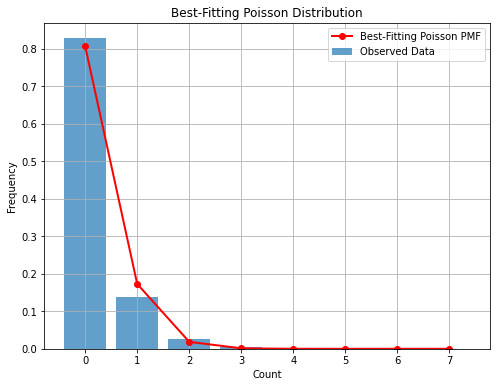

Best-fitting Poisson parameter (mu): 0.2143535535017293


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize

# Given data
data = [(0, 7840), (1, 1317), (2, 239), (3, 42), (4, 14), (5, 4), (6, 4), (7, 1)]

# Extract counts from the data
counts = np.array([count for _, count in data])

#Normalize the counts
counts = counts/np.sum(counts)

# Define the negative log-likelihood function for a Poisson distribution
def neg_log_likelihood(params, counts):
    mu = params[0]
    expected_counts = poisson(mu).pmf(np.arange(len(counts)))
    return -np.sum(counts * np.log(expected_counts))

# Fit the Poisson distribution to the data by minimizing the negative log-likelihood
initial_guess = [np.mean(counts)]
result = minimize(neg_log_likelihood, initial_guess, args=(counts,))
mu_fit = result.x[0]

# Generate x values for the plot
x_values = np.arange(len(counts))

# Calculate the probability mass function (PMF) for the best-fitting Poisson distribution
pmf_values = poisson(mu_fit).pmf(x_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.bar(x_values, counts, label='Observed Data', alpha=0.7)
plt.plot(x_values, pmf_values, 'ro-', label='Best-Fitting Poisson PMF', linewidth=2)
plt.title('Best-Fitting Poisson Distribution')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.xticks(x_values)
plt.grid(True)
plt.legend()
plt.show()

print("Best-fitting Poisson parameter (mu):", mu_fit)
